In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy import stats
import time

In [3]:
df = pd.read_csv("dog_rates_tweets.csv", parse_dates = ['created_at'])

In [4]:
def find_rating(text):
    match = re.search(r'(\d+(\.\d+)?)/10', text)
    if match:
        rating = float(match.group(1))
        if (rating > 25):
            return None      
        return rating
    return None
    

In [5]:
df['rating'] = df['text'].apply(find_rating)

In [6]:
def timestamp(datetime):
    return datetime.timestamp()

In [7]:
df['timestamp'] = df['created_at'].apply(timestamp)

In [8]:
df.dropna(inplace=True)

In [9]:
myLinregress = stats.linregress(df['timestamp'], df['rating'])

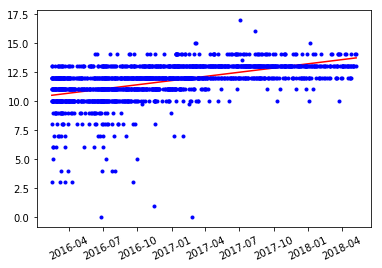

In [10]:
plt.xticks(rotation=25)
plt.plot(df['created_at'], df['timestamp']*myLinregress.slope + myLinregress.intercept, 'r-', alpha=1.0)
plt.plot(df['created_at'], df['rating'], 'b.', linewidth=3)
plt.show()

In [11]:
print(myLinregress.pvalue)

1.0836168506032591e-104


In [12]:
residuals = df['rating'] - (myLinregress.slope*df['timestamp'] + myLinregress.intercept)

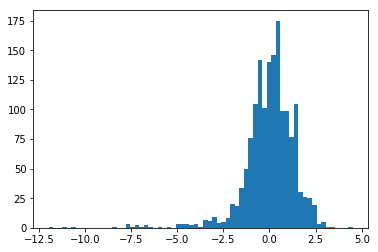

In [17]:
plt.hist(residuals, bins='auto')
plt.show()